# Tendência e Sazonalidade

por **Cibele Russo**

**ICMC/USP - São Carlos SP**

Baseado em 

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.

- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.




Considere as observações $\{Z_t, t=1,\ldots,N\}$ de uma série temporal.

Podemos escrever um modelo de decomposição de $Z_t$ como uma soma de três componentes não-observáveis:

$$Z_t = T_t + S_t + a_t$$

em que

- $T_t$ representa uma componente de **tendência**

- $S_t$ representa uma componente de **sazonalidade**

- $a_t$ é uma **componente aleatória** (resíduos ou ruído), com média 0 e variância $\sigma^2_a$ .

Se $\{a_t\}$ for um ruído branco, então $Cov(a_t,a_s) = 0$ com $s\neq t$, mas podemos eventualmente relaxar essa suposição supondo $\{a_t\}$ um processo estacionário. Segue-se que, em geral, $\{Z_t\}$ é uma série não-estacionária.

<img src="Tendencia_.jpeg" width="700">

## Tendência

Suponha inicialmente que a componente sazonal $S_t$ não esteja presente. Um modelo inicial é

$$Z_t = T_t + a_t$$

em que $a_t$ é um ruído branco, com variância $\sigma^2_a$.



Queremos estimar $T_t$. Para isso, considere algumas possibilidades:

i. ajustar uma função no tempo, como um polinômio, uma exponencial ou outra função suave de $t$;

ii. suavizar (ou filtrar) os valores da série ao redor de um ponto, para estimar a tendência naquele ponto

iii. suavizar os valores da śerie através de sucessivos ajustes de retas de mínimos quadrados ponterados ('lowess')


Estimada a tendência, $\widehat{T}_t$, podemos obter a série ajustada para tendência ou livre de tendência

$$Y_t = Z_t - \widehat{T}_t$$

Para eliminar a tendência de uma série, também é possível considerar as diferenças. Normalmente para séries econômicas, a primeira diferença


$$\Delta Z_t = Z_t - Z_{t-1}$$ já é estacionária.



### Tendência polinomial

Suponha que

$$T_t = \beta_0+\beta_1t + \ldots +\beta_m t^m$$

onde o grau do polinômio $m$ é bem menor do que o número de observações N.

Pode-se utilizar o método de mínimos quadrados para estimar $\beta_0,\ldots,\beta_m$ e obter $\widehat{\beta}_0,\ldots,\widehat{\beta}_m$.

In [1]:
# Exemplo tendência polinomial - Carregando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


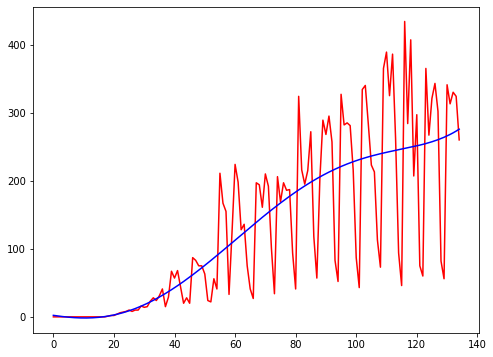

In [2]:
covidSP = pd.read_csv('covidSP.csv', index_col=0, parse_dates=True)


# Aqui não trabalharemos com as datas mas sim com um índice inteiro das observações
x = np.array(range(len(covidSP.index)))

y = np.array(covidSP['deaths'])

polynomial = np.polyfit(x, y, 5)
p5 = np.poly1d(polynomial)

xx = np.linspace(x.min(), x.max(), len(y))

plt.rcParams['figure.figsize'] = [8,6]

plt.plot(x,y,label="Real data",color="red") # Plota os dados
plt.plot(xx,p5(xx),label="Polinomio",color="blue") # Polinômio

## Sazonalidade

Comportamento da série temporal tende a se repetir a cada s perı́odos de tempo.

Por exemplo, para dados de COVID-19, os picos em geral ocorrem às terças-feiras e aos fins de semana os registros diminuem, dada a sistemática das notificações.

**Tipos de Sazonalidade**

- **Aditiva**. A série apresenta flutuações sazonais mais ou menos constantes não importando o nı́vel global da série.

- **Multiplicativa**. O tamanho das flutuações sazonais varia dependendo do nı́vel global da série.


<img src= "Sazonalidade_.jpeg" width="700">

Considere as observações $\{Z_t, t=1,\ldots,N\}$ de uma série temporal.

Supondo que não existe tendência mas somente sazonalidade :

$$Z_t =  S_t + a_t$$

em que

- $S_t$ representa uma componente de **sazonalidade**

- $a_t$ é um ruído branco com média 0 e variância $\sigma^2_a$.

Se a sazonalidade for multiplicativa o modelo é definido como

$$Z_t =  S_t  a_t$$

**Métodos para estimar a sazonalidade**

Para obter a sazonalidade ajustada $\widehat{S_t}$, podemos utilizar diferentes métodos:

- **Método da regressão** (método determinístico) em que as covariáveis são variáveis periódicas, por exemplo seno, cosseno ou variáveis 'dummy', que são variáveis indicadoras  


- **Médias móveis** (método estocástico)

E então obtemos a série livre de sazonalidade (ou sazonalmente ajustada)


$$Y_t = Z_t - \widehat{S}_t, \mbox{  no caso aditivo, ou}$$


$$Y_t = Z_t / \widehat{S}_t \mbox{ no caso multiplicativo}$$ 

Aqui, nós usaremos a função [seasonal_decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) do pacote [statsmodels](https://www.statsmodels.org/stable/index.html).

In [3]:
import pandas as pd

from pandas import read_csv
from matplotlib import pyplot

pkgdir = '/home/cibele/CibelePython/AprendizadoDinamico/Data'

# Air Passengers: Passageiros aéreos
passageiros = pd.read_csv(f'{pkgdir}/airline_passengers.csv', index_col=0,
                            parse_dates=True)


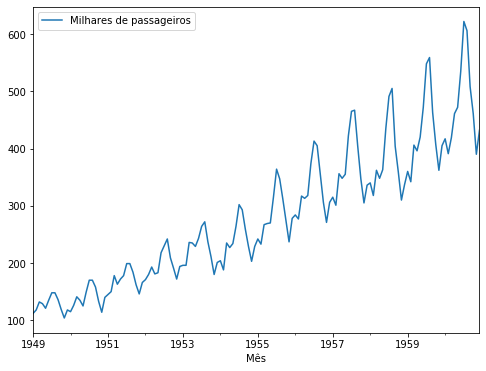

In [4]:
# Para essa análise, os dados faltantes devem ser excluídos!

passageiros = passageiros.dropna()

passageiros.plot()

# A sazonalidade é aditiva ou multiplicativa?



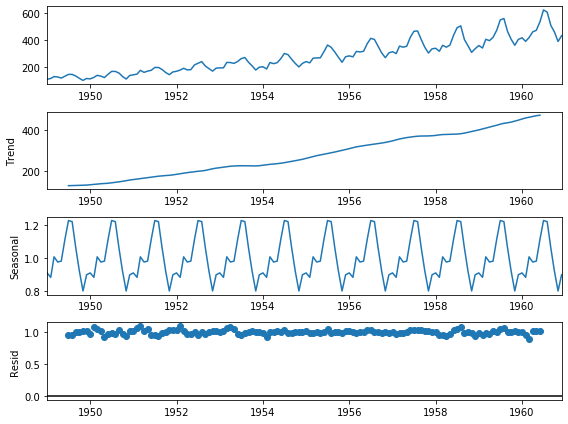

In [5]:
import statsmodels.api as sm

# Decomposição em tendência e sazonalidade

result = sm.tsa.seasonal_decompose(passageiros, model='multiplicative')


result.plot();


In [6]:
# Olhe para as componentes do objeto result

result.seasonal

Mês
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [7]:
result.trend.head(15)

Mês
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
Name: trend, dtype: float64

**Outra forma de chamar a função**

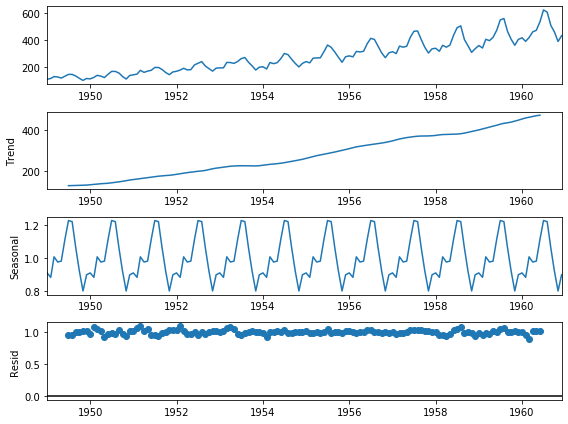

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(passageiros, model='multiplicative')

result.plot();



**Exercício**

Considere os dados de CO2 e da Jhonson & Johnson. Como ficam as decomposições em Tendência e Sazonalidade?